In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('clustering.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
X = data[["LoanAmount","ApplicantIncome"]]

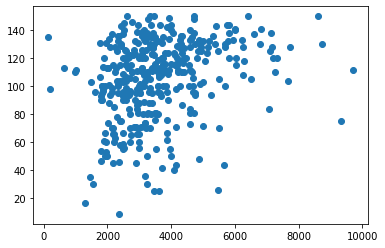

In [6]:
# Visualize the data
plt.scatter(X.ApplicantIncome, X.LoanAmount)

Step 1 - Choose the number of clusters (k) and select random centroid for each cluster

Step 2 - Assign all the points to the closest cluster centroid

Step 3 - Recompute centroids of newly formed clusters

Step 4 - Repeat step 2 and 3.

In [7]:
# Step 1 - Choose the number of clusters (k) and select random centroid for each cluster
#number of clusters
K=3

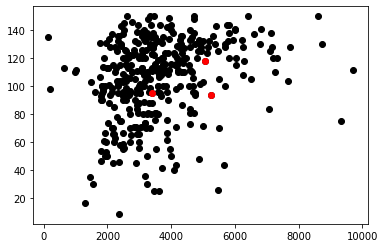

In [38]:
# Select random samples
Centroids = X.sample(K)

plt.scatter(X.ApplicantIncome, X.LoanAmount, c="black")
plt.scatter(Centroids.ApplicantIncome, Centroids.LoanAmount, c="red")


In [39]:
diff = 1
j=0

In [40]:
while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row.iloc[i+2] < min_dist:
                min_dist = row.iloc[i+2]
                pos = i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

-8.519510860306696
-203.47280958361705
-111.98961242432297
-163.54033867216276
-137.5036058084487
-121.71293760862933
-46.7501216812597
-46.4934676023523
-55.03495831127759
-9.190752402517077
-9.19844100901777
-9.237706177129652
0.0


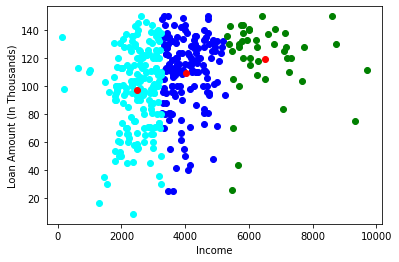

In [37]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()